In [1]:
import numpy as np
from scipy.special import wofz
import matplotlib.pyplot as plt
from tqdm import tqdm
import pyspeckit
from scipy.integrate import quad
%matplotlib inline
plt.rc('axes', lw = 2)
plt.rc('text', usetex = True)

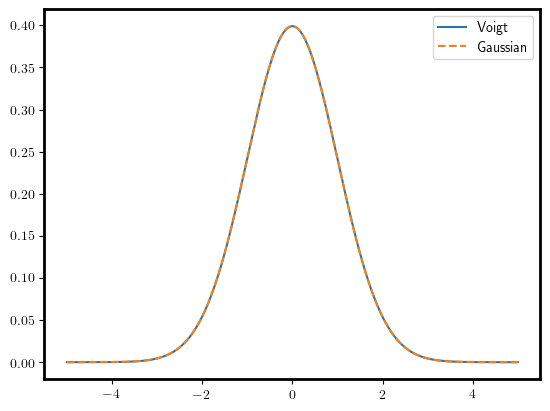

0.3989372836656826

In [2]:
from scipy.special import wofz

def voigt(x, Sigma, gamma):
    z = (x + 1j *gamma) / (Sigma*np.sqrt(2))
    return np.real(wofz(z)) / (Sigma*np.sqrt(2*np.pi))


x = np.linspace(-5, 5,1000)
vogt = voigt(x, Sigma=1, gamma=0)


gaussian_curve = np.exp(-x**2 / (2*1**2)) / np.sqrt(2*np.pi*1**2)

plt.plot(x, vogt, label='Voigt')
plt.plot(x, gaussian_curve, label='Gaussian', ls = '--')
plt.legend()
plt.show()
vogt.max()

In [3]:
def tau_lambda_voigt(Lambda, t0, sigma, gamma):
    z = 1 / (sigma * np.sqrt(2)) * (Lambda + 1j * gamma) 
    voigt = t0 * (np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi)))
    try: return np.asarray([min(v,1) for v in voigt]) ## account for saturation
    except: return min(voigt,1)

In [4]:
def EW_voigt(Lambda, t0, sigma = 1, gamma = 1):
    return (1 - np.exp(-tau_lambda_voigt(Lambda,t0, sigma, gamma)))

In [5]:
tau_0_values = np.logspace(-1,4.5,200)
wavelengths = np.linspace(-20,20,2000)
delta_lambda = wavelengths[1] - wavelengths[0]

ew_values_voigt = []


for tau0_val in tau_0_values:
    #integral = np.sum(EW_voigt(wavelengths, tau0_val, gamma = 1, sigma = 1)) * delta_lambda
    integral,_ = quad(EW_voigt, -np.infty, np.infty, args = (tau0_val, 1, 0.2))
    ew_values_voigt.append(integral)
    
ew_values_gauss = []
    
for tau0_val in tau_0_values:
    #integral = np.sum(EW_voigt(wavelengths, tau0_val, gamma = 0, sigma = 1)) * delta_lambda
    integral,_ = quad(EW_voigt, -np.infty, np.infty, args = (tau0_val, 1, 0))
    ew_values_gauss.append(integral)

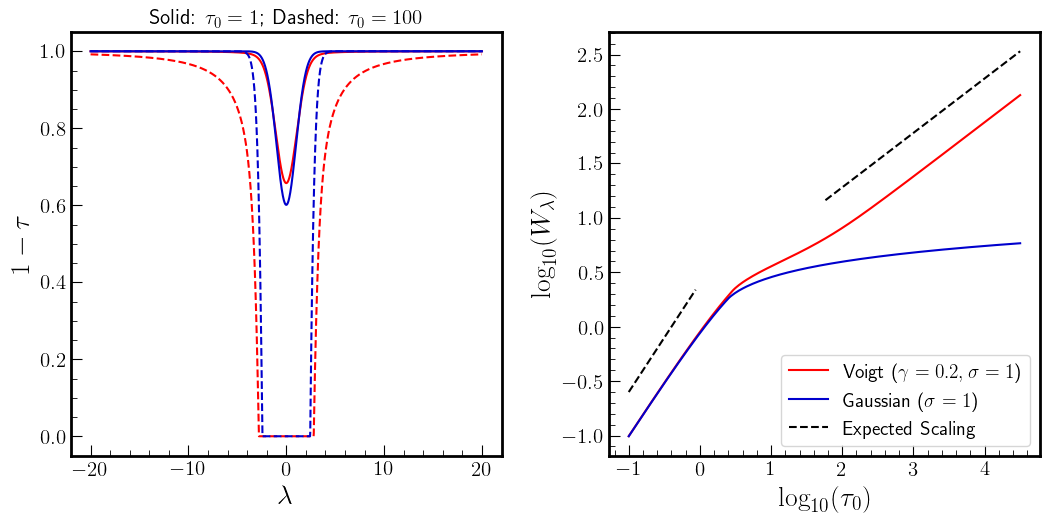

In [6]:
plt.figure(figsize = (12.5,5.5))
plt.subplots_adjust(wspace = 0.25)
ax = plt.subplot(1,2,1)

t1 = 1 - tau_lambda_voigt(wavelengths, t0 = 1, sigma = 1, gamma = 0.2)
t2 = 1 - tau_lambda_voigt(wavelengths, t0 = 1, sigma = 1, gamma = 0)
t3 = 1 - tau_lambda_voigt(wavelengths, t0 = 50, sigma = 1, gamma = 0.2)
t4 = 1 - tau_lambda_voigt(wavelengths, t0 = 50, sigma = 1, gamma = 0)
plt.plot(wavelengths, t1, color = 'red', label = 'Voigt ($\gamma = 1, \sigma = 1$)')
plt.plot(wavelengths, t2, color = 'mediumblue', label = 'Gaussian ($\sigma = 1$)')
plt.plot(wavelengths, t3, color = 'red', label = 'Voigt ($\gamma = 1, \sigma = 1$)', ls = '--')
plt.plot(wavelengths, t4, color = 'mediumblue', label = r'Gaussian ($\sigma = 1$); $\tau_0 = 10$', ls = '--')
plt.title(r'Solid: $\tau_0 = 1$; Dashed: $\tau_0 = 100$', fontsize = 15)


plt.xlabel(r'$\lambda$', fontsize = 20); plt.ylabel(r'$1 - \tau$', fontsize = 20)
ax.minorticks_on()
ax.tick_params(which = 'both', direction = 'in', labelsize = 15)
ax.tick_params(which = 'minor', length =4); ax.tick_params(which = 'major', length =8)

ax = plt.subplot(1,2,2)
plt.plot(np.log10(tau_0_values), np.log10(ew_values_voigt), color = 'red', label = 'Voigt ($\gamma = 0.2, \sigma = 1$)')
plt.plot(np.log10(tau_0_values), np.log10(ew_values_gauss), color = 'mediumblue', label = 'Gaussian ($\sigma = 1$)')
plt.xlabel(r'$\log_{10}(\tau_0)$', fontsize = 20); plt.ylabel(r'$\log_{10}(W_{\lambda})$', fontsize = 20)

pivot1 = 35
pivot2 = 100
const = .4
plt.plot(np.log10(tau_0_values[0:pivot1]), np.log10(tau_0_values[0:pivot1])+const, color ='black', ls = '--')
#plt.plot(np.log10(tau_0_values[pivot1:pivot2]), np.log10(np.sqrt(np.log(tau_0_values[pivot1:pivot2])))+const+0.45, color ='black', ls = '--')
plt.plot(np.log10(tau_0_values[pivot2:]), 0.5*np.log10(tau_0_values[pivot2:])+0.28, color ='black', ls = '--',
        label = 'Expected Scaling')


ax.minorticks_on()
ax.tick_params(which = 'both', direction = 'in', labelsize = 15)
ax.tick_params(which = 'minor', length =4); ax.tick_params(which = 'major', length =8)
plt.legend(loc = 'lower right', fontsize = 14)
_ = ax.set_xticks([-1,0,1,2,3,4])
# plt.axvline(0.65 )

# plt.savefig('COG.pdf', bbox_inches = 'tight')